# EDA

## Temperature

In [1]:
import torch
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


root_path = '/root/mine/BDC2024/dataset/global'

temp_data = np.load(os.path.join(root_path, 'temp.npy')) # (17544, 3850, 1)
print(temp_data.shape)

(17544, 3850, 1)


In [ ]:
# temp_data_1year = temp_data[:365*24, :, 0]
# temp_df = pd.DataFrame(temp_data_1year) # 8760 x 3850
temp_data = temp_data[:, :, 0]
temp_df = pd.DataFrame(temp_data) # 17544 x 3850
print(temp_df.shape)

In [ ]:
# 夏天平均气温应大于15度, 用于排除与中国气候不符的站点
summer_df = pd.concat([temp_df.iloc[4000:6000], temp_df.iloc[4000+365*24:6000+365*24]]) # TODO: 改变夏天范围
print(summer_df.shape)
summer_idx = summer_df.mean(axis=0).apply(lambda x: x > 15) # TODO: 修改温度
summer_idx = summer_idx[summer_idx].index.to_list()
print(f"{len(summer_idx)/temp_data.shape[1]} of the stations have an average temperature above 15 degrees in summer.")
print(summer_idx)

In [ ]:
# 冬天平均气温应低于20度, 用于排除与中国气候不符的站点
winter_df = pd.concat([temp_df.iloc[0:600], temp_df.iloc[0+365*24:600+365*24]]) # TODO: 改变冬天范围
print(winter_df.shape)
winter_idx = winter_df.mean(axis=0).apply(lambda x: x < 20) # TODO: 修改温度
winter_idx = winter_idx[winter_idx].index.to_list()
print(f"{len(winter_idx)/temp_data.shape[1]} of the stations have an average temperature below 20 degrees in winter.")
print(winter_idx)

In [ ]:
# 选取夏天和冬天都符合条件的站点(即交集)
selected_idx = list(set(summer_idx) & set(winter_idx)) # TODO: set(north_idx)
print(f"Selected {len(selected_idx)} stations.")
print(selected_idx)
# TODO: selected_idx 还应对风速和global进行过滤

## Filter

In [2]:
# 全量划分用
selected_idx = np.arange(3850)

# TODO: 同时使用此index对风速和global进行筛选
temp_data = np.load(os.path.join(root_path, 'temp.npy')) # (17544, 3850, 1)
global_data = np.load(os.path.join(root_path, 'global_data.npy')) # (5848, 4, 9, 3850)
wind_data = np.load(os.path.join(root_path, 'wind.npy')) # (17544, 3850, 1)

global_selected = global_data[:, :, :, selected_idx]
temp_selected = temp_data[:, selected_idx, :]
wind_selected = wind_data[:, selected_idx, :]

print(global_selected.shape, temp_selected.shape, wind_selected.shape)

(5848, 4, 9, 3850) (17544, 3850, 1) (17544, 3850, 1)


In [3]:
df_temp = pd.DataFrame(temp_selected[:, :, 0])
df_wind = pd.DataFrame(wind_selected[:, :, 0])
print(df_temp)

       0     1     2     3     4     5     6     7     8     9     ...  3840  \
0       1.0   8.2   8.8  10.0   9.6   6.0   9.4  10.2   9.2   8.1  ...  25.0   
1       0.2   8.2   8.3  10.1  10.5   6.6   9.4   9.6   8.5   7.5  ...  28.0   
2       0.5   8.2   8.4  10.5  10.5   6.2   9.4   8.7   8.1   7.4  ...  31.0   
3       0.1   8.7   8.6   9.7   8.6   5.9   9.4   8.7   8.7   8.0  ...  31.0   
4       0.2   9.2   8.4   8.7   8.1   5.5   9.4   8.5   8.7   7.6  ...  32.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
17539  -1.7   4.2   3.7   5.5   7.0   5.1   5.5   5.5   3.7   6.2  ...  22.0   
17540  -1.4   4.5   3.8   5.5   7.0   5.3   5.0   5.2   4.0   6.2  ...  24.0   
17541  -1.2   4.2   4.2   5.2   6.7   5.1   4.7   5.2   4.2   6.0  ...  26.0   
17542  -1.5   4.1   4.2   5.5   6.7   5.2   4.6   5.0   4.2   6.3  ...  30.0   
17543  -2.2   4.2   4.3   5.5   6.2   4.7   5.1   4.7   4.5   6.4  ...  31.0   

       3841  3842  3843  3844  3845  38

<Axes: >

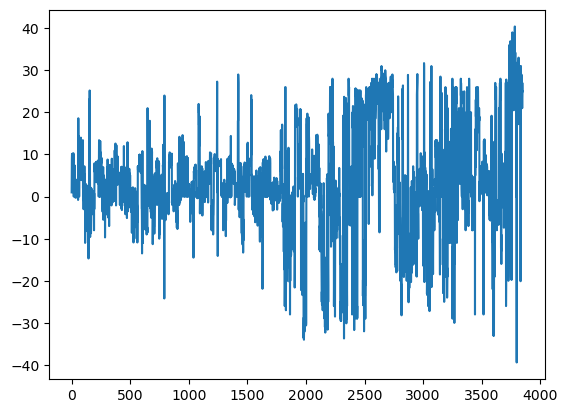

In [29]:
df_temp.loc[0].plot()

<Axes: >

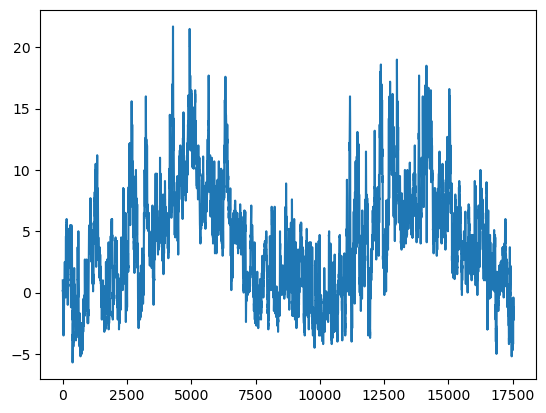

In [30]:
df_temp[0].plot()

In [4]:
# rolling
df_rolling_temp = df_temp.rolling(window=7*24, min_periods=1) # TODO: 修改window
df_rolling_wind = df_wind.rolling(window=7*24, min_periods=1)
print(df_rolling_temp.mean())

           0         1         2          3          4         5         6     \
0      1.000000  8.200000  8.800000  10.000000   9.600000  6.000000  9.400000   
1      0.600000  8.200000  8.550000  10.050000  10.050000  6.300000  9.400000   
2      0.566667  8.200000  8.500000  10.200000  10.200000  6.266667  9.400000   
3      0.450000  8.325000  8.525000  10.075000   9.800000  6.175000  9.400000   
4      0.400000  8.500000  8.500000   9.800000   9.460000  6.040000  9.400000   
...         ...       ...       ...        ...        ...       ...       ...   
17539 -1.645238  2.538095  2.801190   3.306548   4.583333  4.133929  3.388690   
17540 -1.637500  2.551786  2.828571   3.351190   4.598214  4.152381  3.399405   
17541 -1.628571  2.566667  2.856548   3.400000   4.616667  4.172024  3.411905   
17542 -1.622619  2.579167  2.882143   3.438690   4.629762  4.192262  3.427976   
17543 -1.619643  2.591071  2.907738   3.489286   4.651786  4.204167  3.450595   

            7         8    

In [5]:
# shift
df_shift_temp = df_temp.shift(periods=7*12, axis=0, fill_value=0)
df_shift_wind = df_wind.shift(periods=7*12, axis=0, fill_value=0)
print(df_shift_temp)

       0     1     2     3     4     5     6     7     8     9     ...  3840  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
17539  -2.5   2.7   4.0   2.7   6.0   5.9   4.6   2.6   4.2   4.3  ...  26.0   
17540  -2.5   3.0   3.6   3.5   4.2   5.8   4.2   2.2   4.2   5.2  ...  25.0   
17541  -2.5   2.0   3.4   2.5   4.6   5.3   3.7   1.0   4.0   6.0  ...  26.0   
17542  -1.7   2.7   3.5   2.6   5.5   5.5   4.1   1.2   3.6   5.9  ...  25.0   
17543  -1.0   3.5   4.0   3.2   6.6   5.3   3.9   2.7   4.2   6.4  ...  24.0   

       3841  3842  3843  3844  3845  38

In [6]:
# diff
df_diff_temp = df_temp.diff(periods=1, axis=0) # TODO: 换用二阶微分？
df_diff_temp.fillna(0, inplace=True)
df_diff_wind = df_wind.diff(periods=1, axis=0)
df_diff_wind.fillna(0, inplace=True)
print(df_diff_temp)

       0     1     2     3     4     5     6     7     8     9     ...  3840  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      -0.8   0.0  -0.5   0.1   0.9   0.6   0.0  -0.6  -0.7  -0.6  ...   3.0   
2       0.3   0.0   0.1   0.4   0.0  -0.4   0.0  -0.9  -0.4  -0.1  ...   3.0   
3      -0.4   0.5   0.2  -0.8  -1.9  -0.3   0.0   0.0   0.6   0.6  ...   0.0   
4       0.1   0.5  -0.2  -1.0  -0.5  -0.4   0.0  -0.2   0.0  -0.4  ...   1.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
17539  -0.5  -0.3   0.4   0.8   0.3   0.1   0.0   0.0   0.6   0.3  ...  -1.0   
17540   0.3   0.3   0.1   0.0   0.0   0.2  -0.5  -0.3   0.3   0.0  ...   2.0   
17541   0.2  -0.3   0.4  -0.3  -0.3  -0.2  -0.3   0.0   0.2  -0.2  ...   2.0   
17542  -0.3  -0.1   0.0   0.3   0.0   0.1  -0.1  -0.2   0.0   0.3  ...   4.0   
17543  -0.7   0.1   0.1   0.0  -0.5  -0.5   0.5  -0.3   0.3   0.1  ...   1.0   

       3841  3842  3843  3844  3845  38

In [7]:
temp_rolling = np.expand_dims(np.array(df_rolling_temp.mean()), axis=-1)
temp_shift = np.expand_dims(np.array(df_shift_temp), axis=-1)
temp_diff = np.expand_dims(np.array(df_diff_temp), axis=-1)
wind_rolling = np.expand_dims(np.array(df_rolling_wind.mean()), axis=-1)
wind_shift = np.expand_dims(np.array(df_shift_wind), axis=-1)
wind_diff = np.expand_dims(np.array(df_diff_wind), axis=-1)
print(temp_rolling.shape, temp_shift.shape, temp_diff.shape)

(17544, 3850, 1) (17544, 3850, 1) (17544, 3850, 1)


In [8]:
temp_enhancce = np.concatenate([temp_rolling, temp_shift, temp_diff, temp_selected], axis=-1)
wind_enhancce = np.concatenate([wind_rolling, wind_shift, wind_diff, wind_selected], axis=-1)
print(temp_enhancce.shape, wind_enhancce.shape)

(17544, 3850, 4) (17544, 3850, 4)


In [16]:
print(temp_enhancce[1230, 0, -1:], temp_selected[1230, 0, 0:])

[7.2] [7.2]


In [9]:
# 保存
root_path = '/root/mine/BDC2024/dataset/rolling_shift_diff_origin'
if not os.path.exists(os.path.join(root_path, 'train')):
    os.makedirs(os.path.join(root_path, 'train'))

train_path = os.path.join(root_path, 'train')

np.save(os.path.join(train_path, 'temp.npy'), temp_enhancce)
np.save(os.path.join(train_path, 'wind.npy'), wind_enhancce)

In [10]:
! ln -s /root/host/data/global/global_data.npy $root_path/train/global_data.npy

划分训练集和验证集

In [ ]:
# 划分训练集和验证集
l = temp_selected.shape[0]
train_size = int(l * 0.9) # 90%作为训练集
train_global = global_selected[:int(train_size/3), :, :, :]
train_temp = temp_selected[:train_size, :, :]
train_wind = wind_selected[:train_size, :, :]

val_global = global_selected[int(train_size/3):, :, :, :]
val_temp = temp_selected[train_size:, :, :]
val_wind = wind_selected[train_size:, :, :]

print("Train:", train_global.shape, train_temp.shape, train_wind.shape)
print("Val:", val_global.shape, val_temp.shape, val_wind.shape)

In [ ]:
# 保存训练集和验证集
root_path = '/root/mine/BDC2024/dataset/north_rolling'

if not os.path.exists(os.path.join(root_path, 'train')):
    os.makedirs(os.path.join(root_path, 'train'))
if not os.path.exists(os.path.join(root_path, 'val')):
    os.makedirs(os.path.join(root_path, 'val'))

train_path = os.path.join(root_path, 'train')
val_path = os.path.join(root_path, 'val')

np.save(os.path.join(train_path, 'global_data.npy'), train_global)
np.save(os.path.join(train_path, 'temp.npy'), train_temp)
np.save(os.path.join(train_path, 'wind.npy'), train_wind)

np.save(os.path.join(val_path, 'global_data.npy'), val_global)
np.save(os.path.join(val_path, 'temp.npy'), val_temp)
np.save(os.path.join(val_path, 'wind.npy'), val_wind)

In [ ]:
! ls ./dataset/train_selected/